In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
df = pd.read_csv("delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


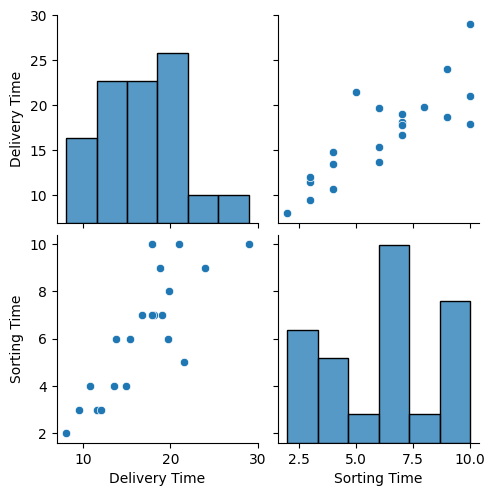

In [35]:
sns.pairplot(df)
plt.show()

<Axes: ylabel='Sorting Time'>

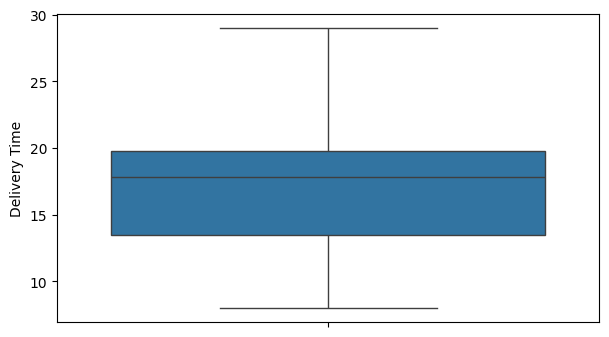

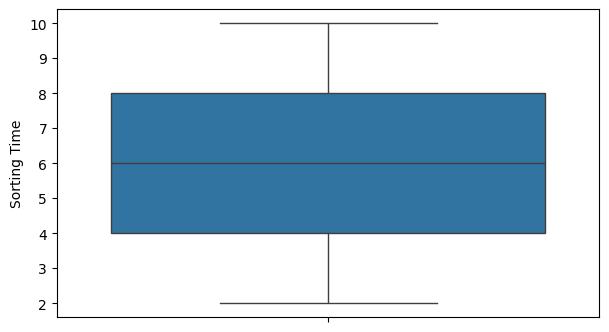

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(7,4))
sns.boxplot(df["Delivery Time"])

plt.subplots(figsize=(7,4))
sns.boxplot(df["Sorting Time"])

In [37]:
# Correlation
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [38]:
# Split the data into features (X) and target variable (y)
X = df[['Delivery Time']]
y = df['Sorting Time']

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [40]:
model.fit(X,y)

LinearRegression()

In [41]:
df['Y_pred'] = model.predict(X)
df['Y_pred']

0      7.931943
1      4.828866
2      7.414763
3      9.173174
4     11.241892
5      5.594291
6      7.104456
7      3.173891
8      6.649338
9      7.001020
10     7.447863
11     3.691071
12     6.144570
13     4.001378
14     4.220662
15     5.399832
16     4.932302
17     6.736224
18     2.553276
19     6.620376
20     8.138815
Name: Y_pred, dtype: float64

In [42]:
df

,Delivery Time,Sorting Time,Y_pred
0,21.00,10,7.931943
1,13.50,4,4.828866
2,19.75,6,7.414763
3,24.00,9,9.173174
4,29.00,10,11.241892
5,15.35,6,5.594291
6,19.00,7,7.104456
7,9.50,3,3.173891
8,17.90,10,6.649338
9,18.75,9,7.001020


In [43]:
model.score(X,y)

0.682271474841723

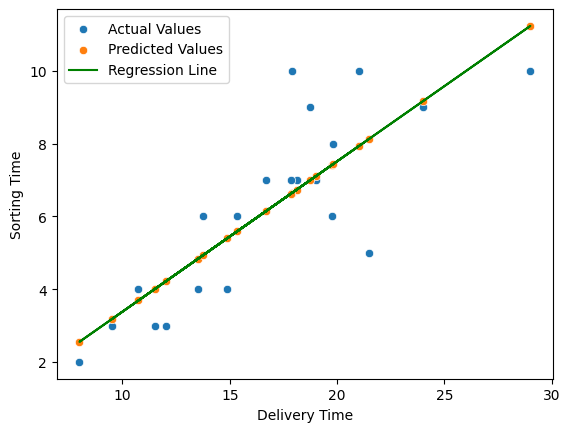

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf


# Plotting actual vs. predicted values
sns.scatterplot(x='Delivery Time', y='Sorting Time', data=df, label="Actual Values")
sns.scatterplot(x='Delivery Time', y='Y_pred', data=df, label="Predicted Values")

# Plot the regression line
plt.plot(df['Delivery Time'],df["Y_pred"], color='green', label='Regression Line')

plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")
plt.legend()
plt.show()


In [45]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse = mean_squared_error(df['Sorting Time'], df['Y_pred'])
print("Mean Squared Error:", mse)


Mean Squared Error: 1.9553633044888064


In [46]:
# Assuming you've trained your model and made predictions
# Make predictions using the model
df['Y_pred'] = model.predict(df["Sorting Time"].values.reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(df['Sorting Time'], df['Y_pred']))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Root Mean Squared Error (RMSE): 4.62


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [47]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [49]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse.round(2)}')
print(f'R-square Error: {r2.round(2)}')

Mean Squared Error: 4.64
R-square Error: 0.25


In [50]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha hyperparameter

# Fit the Ridge model
ridge_model.fit(X_train, y_train)

# Make predictions
ridge_y_pred = ridge_model.predict(X_test)

# Evaluate the Ridge model
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

print(f'Ridge Mean Squared Error: {ridge_mse.round(2)}')
print(f'Ridge R-square Error: {ridge_r2.round(2)}')


Ridge Mean Squared Error: 4.64
Ridge R-square Error: 0.25
